# 연습문제 정답

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/math4ds/blob/main/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import sklearn
import pandas
import sympy

print('sklearn', sklearn.__version__)
print('pandas', pandas.__version__)
print('sympy', sympy.__version__)

sklearn 1.6.0
pandas 2.2.2
sympy 1.13.1


## 1장

1-7

In [2]:
from sympy import *

x = symbols('x')
f = exp(2*x - 1)

dx_f = diff(f)
print(dx_f)

2*exp(2*x - 1)


1-8

In [3]:
from sympy import *

x = symbols('x')
f = log(x**2 - 1)

dx_f = diff(f)
print(dx_f)

2*x/(x**2 - 1)


1-9

In [4]:
from math import exp

p = 1000	# 원금
r = .05	# 이자율
t = 3		# 년도
n = 12	# 연간 복리 적용 횟수

a = p * (1 + (r/n))**(n * t)

print(a)

1161.4722313334678


1-10

In [5]:
from math import exp

p = 1000 # 원금
r = .05 # 이자율
t = 3.0 # 년도

a = p * exp(r*t)

print(a)

1161.834242728283


1-11

In [6]:
from sympy import *

# 'x'를 SymPy에 선언합니다
x = symbols('x')

# 파이썬으로 함수를 정의합니다
f = 3*x**2 + 1

# 함수의 도함수를 계산합니다
dx_f = diff(f)
print(dx_f)
print(dx_f.subs(x,3))

6*x
18


1-12

In [7]:
from sympy import *

# 'x'를 SymPy에 선언합니다
x, y = symbols('x y')

_y = x**3 - 1
z = log(y) + 2

dz_dy = diff(z)
dy_dx = diff(_y)
print(dz_dy * dy_dx)

3*x**2/y


1-13

In [8]:
from sympy import *

# 'x'를 SymPy에 선언합니다
x = symbols('x')

# 파이썬으로 함수를 정의합니다
f = 3*x**2 + 1

# x = 0과 2 사이에서 함수를 적분합니다
area = integrate(f, (x, 0, 2))

print(area)

10


## 2장

2-5

In [9]:
from scipy.stats import binom

n = 137
p = .40

p_50_or_more_noshows = 0.0

for x in range(50,138):
    p_50_or_more_noshows += binom.pmf(x, n, p)

print(p_50_or_more_noshows)

0.8220955881474251


2-6

In [10]:
from scipy.stats import beta

heads = 15
tails = 4

p = 1.0 - beta.cdf(.5, heads, tails)

print(p)

0.9962310791015625


2-7

In [11]:
from scipy.stats import beta

heads = 15
tails = 4

p = beta.cdf(0.8, heads, tails) - beta.cdf(0.7, heads, tails)
print(p)

0.33647497661034353


## 3장

3-1

In [12]:
from math import sqrt

sample = [1.78, 1.75, 1.72, 1.74, 1.77]

def mean_sample(values):
    return sum(values) /len(values)

def variance_sample(values):
    mean = mean_sample(values)
    var = sum((v - mean) ** 2 for v in values) / len(values)
    return var

def std_dev_sample(values):
    return sqrt(variance_sample(values))

mean = mean_sample(sample)
std_dev = std_dev_sample(sample)

print("평균: ", mean) # 1.752
print("표준 편차: ", std_dev) # 0.0213542

평균:  1.752
표준 편차:  0.02135415650406264


3-2

In [13]:
from scipy.stats import norm

mean = 64.43
std_dev = 2.99

x = 1 - norm.cdf(70, mean, std_dev)

print(x) # 0.031239839196641972

0.031239839196641972


3-3

In [14]:
from scipy.stats import norm

mean = 42
std_dev = 8

x = norm.cdf(30, mean, std_dev) - norm.cdf(20, mean, std_dev)

print(x)

0.06382743803380352


3-4

In [15]:
from scipy.stats import norm

x = norm.ppf(0.1, loc=42, scale=8)
print(x)  # 31.747587475643197

31.747587475643197


3-5

In [16]:
from math import sqrt
from scipy.stats import norm

def critical_z_value(p, mean=0.0, std=1.0):
    norm_dist = norm(loc=mean, scale=std)
    left_area = (1.0 - p) / 2.0
    right_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_area), norm_dist.ppf(right_area)


def ci_large_sample(p, sample_mean, sample_std, n):
    # 샘플 크기는 30보다 커야 합니다

    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))

    return sample_mean + lower_ci, sample_mean + upper_ci


print(ci_large_sample(p=.99, sample_mean=1.715588,
    sample_std=0.029252, n=34))

(1.7026658973748656, 1.7285101026251342)


3-6

In [17]:
from scipy.stats import norm

mean = 10345
std_dev = 552

p1 = 1.0 - norm.cdf(11641, mean, std_dev)

# 대칭성을 활용합니다
p2 = p1

# 양측 검정의 P 값
p_value = p1 + p2

print("양측 검정의 P 값", p_value)
if p_value <= .05:
    print("양측 검정 통과")
else:
    print("양측 검정 실패")

양측 검정의 P 값 0.01888333596496139
양측 검정 통과


## 4장

4-1

In [18]:
from numpy import array

v = array([1,2])

i_hat = array([2, 0])
j_hat = array([0, 1.5])

basis = array([i_hat, j_hat])

# 벡터 v가 w로 바뀝니다.
w = basis.dot(v)

print(w)

[2. 3.]


4-2

In [19]:
from numpy import array

v = array([1,2])

i_hat = array([-2, 1])
j_hat = array([1, -2])

basis = array([i_hat, j_hat])

# 벡터 v가 w로 바뀝니다.
w = basis.dot(v)

print(w)

[ 0 -3]


4-3

In [20]:
import numpy as np

a = np.array([[3,-2],[1,4]])
b = np.array([[5,2],[3,-1]])
c = a.dot(b)
print(c)

[[ 9  8]
 [17 -2]]


4-4

In [21]:
import numpy as np
from numpy.linalg import det

i_hat = np.array([1, 0])
j_hat = np.array([2, 2])

basis = np.array([i_hat,j_hat]).transpose()

determinant = det(basis)

print(determinant)

2.0


4-6

In [22]:
import numpy as np

A = np.array([
    [3, 1, 0],
    [2, 4, 1],
    [3, 1, 8]
])

A_inverse = np.linalg.inv(A)
print(A_inverse)

[[ 0.3875 -0.1     0.0125]
 [-0.1625  0.3    -0.0375]
 [-0.125   0.      0.125 ]]


4-7

In [23]:
from numpy import array
from numpy.linalg import inv

A = array([
    [3, 1, 0],
    [2, 4, 1],
    [3, 1, 8]
])

B = array([
    54,
    12,
    6
])

X = inv(A).dot(B)

print(X)

[19.8 -5.4 -6. ]


4-8

In [24]:
from numpy.linalg import det
from numpy import array

i_hat = array([2, 6])
j_hat = array([1, 3])

basis = array([i_hat, j_hat]).transpose()
print(basis)

determinant = det(basis)

print(determinant)

[[2 1]
 [6 3]]
0.0


4-9

In [25]:
import numpy as np

A = np.array([
    [3, 1, 0],
    [2, 4, 1],
    [3, 1, 8]
])

eigenvals, eigenvecs = np.linalg.eig(A)
print("고윳값\n", eigenvals)
print("고유벡터\n", eigenvecs)
A_reconstruction = eigenvecs @ np.diag(eigenvals) @ np.linalg.inv(eigenvecs)
print("재구성 행렬\n", np.round(A_reconstruction))

고윳값
 [8.38761906 2.12592447 4.48645647]
고유벡터
 [[-0.04479915 -0.72643433 -0.45454378]
 [-0.24136078  0.63495848 -0.67565954]
 [-0.96940085  0.26290852  0.5804086 ]]
재구성 행렬
 [[ 3.  1. -0.]
 [ 2.  4.  1.]
 [ 3.  1.  8.]]


## 5장

5-1

m = [1.75919315]
b = [4.69359655]


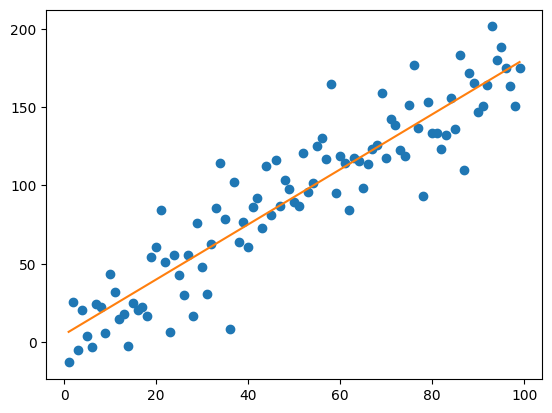

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터를 로드합니다.
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 모델을 훈련합니다.
fit = LinearRegression().fit(X, Y)

# m = 1.75919315, b = 4.69359655
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# 그래프를 그립니다.
plt.plot(X, Y, 'o') # 산점도
plt.plot(X, m*X+b) # 선 그래프
plt.show()

5-2

In [27]:
import pandas as pd

# 판다스 데이 프레임으로 데이터를 읽습니다.
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# 변수 사이의 상관관계를 출력합니다.
correlations = df.corr(method='pearson')
print(correlations)

# 출력:
#          x        y
# x  1.00000  0.92421
# y  0.92421  1.00000

# 통계적 유의성을 검정합니다.
from scipy.stats import t
from math import sqrt

# 표본 크기
n = df.shape[0]
print(n)
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

# 상관계수를 추출합니다.
r = correlations["y"]["x"]

# 검정을 수행합니다.
test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("검정 값: {}".format(test_value))
print("임계 범위: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("상관 관계가 입증되어 귀무 가설을 거부합니다")
else:
    print("상관 관계가 입증되지 않아 귀무 가설을 거부하지 못합니다")

# p 값을 계산합니다.
if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

# 양측 검정이므로 2를 곱합니다.
p_value = p_value * 2
print("P 값: {}".format(p_value))

         x        y
x  1.00000  0.92421
y  0.92421  1.00000
99
검정 값: 23.835515323677328
임계 범위: -1.9844674544266925, 1.984467454426692
상관 관계가 입증되어 귀무 가설을 거부합니다
P 값: 0.0


5-3

In [28]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# 데이터를 로드합니다.
points = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",") \
    .itertuples())

n = len(points)

# 선형 회귀 파라미터
m = 1.75919315
b = 4.69359655

# x = 50에서 예측 구간은 계산합니다.
x_0 = 50
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / \
    (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
	sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

print(predicted_y - margin_of_error, predicted_y + margin_of_error)

50.7920864989629 134.5144216010371


5-4

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 단순 선형 회귀를 수행합니다.
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: 평균=%.3f (표준 편차-%.3f)" % (results.mean(), results.std()))

[0.86119665 0.78237719 0.85733887]
MSE: 평균=0.834 (표준 편차-0.036)


## 6장

6-1

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score


# 데이터를 로드합니다
df = pd.read_csv("https://bit.ly/3BVJ2ip", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("평균 정확도: %.3f (stdev=%.3f)" % (results.mean(),
results.std()))

평균 정확도: 0.999 (stdev=0.002)


6-2

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다
df = pd.read_csv("https://bit.ly/3BVJ2ip", delimiter=",")

# 입력 변수(마지막 열을 제외한 모든 열)를 추출합니다
X = df.values[:, :-1]

# 출력 변수(마지막 열)를 추출합니다
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

"""
오차 행렬은 각 카테고리 내에서 정확도를 평가합니다.
[[진짜음성(TP) 거짓양성(FP)]
 [거짓음성(FN) 진짜양성(TN)]]

대각선은 올바른 예측을 나타내므로 이 값이 높아야 합니다
"""
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[282   0]
 [  9 153]]


6-3

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
df = pd.read_csv("https://bit.ly/3BVJ2ip", delimiter=",")

# 입력 변수(마지막 열을 제외한 모든 열)를 추출 합니다
X = df.values[:, :-1]

# 출력 변수(마지막 열)를 추출합니다
Y = df.values[:, -1]

model = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# 예측을 수행합니다
for _ in range(2):
    n = input("색깔을 입력하세요. {red},{green},{blue}: ")
    (r, g, b) = n.split(",")
    x = model.predict(np.array([[int(r), int(g), int(b)]]))
    if x[0] == 0.0:
        print("DARK")
    else:
        print("LIGHT")

색깔을 입력하세요. {red},{green},{blue}: 0,0,0
LIGHT
색깔을 입력하세요. {red},{green},{blue}: 255,255,255
DARK


## 7장

In [33]:
import pandas as pd

# 데이터를 로드합니다
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=",")

# 입력 변수(마지막 열을 제외한 모든 열)를 추출합니다
X = df.values[:, :-1]

# 출력 변수(마지막 열)를 추출합니다
Y = df.values[:, -1]

# 훈련 데이터와 테스트 데이터를 분할합니다
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

print("훈련 세트 점수: %f" % nn.score(X_train, Y_train))
print("테스트 세트 점수: %f" % nn.score(X_test, Y_test))

print("오차 행렬:")
matrix = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(matrix)

훈련 세트 점수: 0.527778
테스트 세트 점수: 0.333333
오차 행렬:
[[ 0 12]
 [ 0  6]]
